# Veriyi Yükleme

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir=r"C:Tensorflow\f1"

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="training",batch_size=2)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="validation",batch_size=2)

Found 112 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


# Görselleştirme

(2, 500, 500, 3)
[0. 0. 0. 1.]


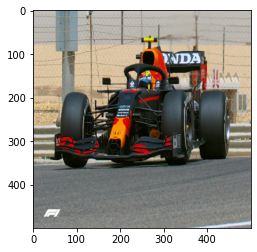

(2, 500, 500, 3)
[0. 0. 0. 1.]


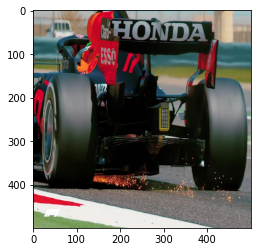

(2, 500, 500, 3)
[0. 0. 1. 0.]


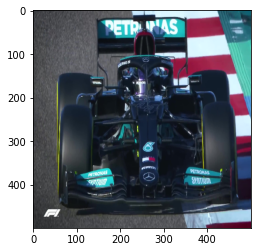

(2, 500, 500, 3)
[1. 0. 0. 0.]


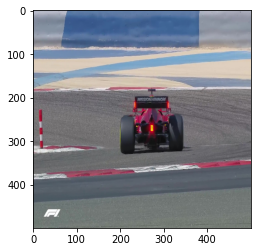

(2, 500, 500, 3)
[0. 0. 0. 1.]


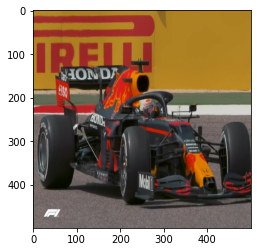

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

for _ in range(5):
    img, label = test_datagen.next()
    print(img.shape)   
    plt.imshow(img[0])
    print(label[0])   

    plt.show()

# Kütüphaneler

In [3]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations

# Functional Model Oluşumu

In [4]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

In [5]:
input_=Input(shape=(500,500,3))

conv11=Conv2D(filters=4,kernel_size=(2,2),activation="elu")(input_)
max11=MaxPooling2D((2,2))(conv11)
conv12=Conv2D(filters=8,kernel_size=(2,2),activation="elu")(max11)
max12=MaxPooling2D((2,2))(conv12)
flat1=Flatten()(max12)

conv21=Conv2D(filters=4,kernel_size=(3,3),activation="elu")(input_)
max21=MaxPooling2D((2,2))(conv21)
conv22=Conv2D(filters=8,kernel_size=(2,2),activation="elu")(max21)
max22=MaxPooling2D((2,2))(conv22)
flat2=Flatten()(max22)

merge=concatenate([flat1,flat2])

fc1=Dense(50,activation="elu")(merge)
fc2=Dense(100,activation="elu")(fc1)
fc3=Dense(100,activation="elu")(fc2)
fc4=Dense(50,activation="elu")(fc3)
out=Dense(4,activation="softmax")(fc4)


model=Model(inputs=input_,outputs=out)



In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500, 500, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 499, 499, 4)  52          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 498, 498, 4)  112         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 249, 249, 4)  0           conv2d[0][0]                     
______________________________________________________________________________________________

# Model Eğitimi

In [7]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()

In [8]:
model.compile(optimizer=optimizer,loss=loss,metrics=["mse","accuracy"])

In [9]:
result=model.fit(train_datagen,epochs=5,verbose=1,validation_data=test_datagen)

Epoch 1/5
56/56 [==============================] - 4s 54ms/step - loss: 4.5769 - mse: 9334.1172 - accuracy: 0.2500 - val_loss: 4.0295 - val_mse: 18740.1562 - val_accuracy: 0.2500
Epoch 2/5
56/56 [==============================] - 3s 45ms/step - loss: 4.0295 - mse: 21681.5312 - accuracy: 0.2500 - val_loss: 4.0295 - val_mse: 19766.4785 - val_accuracy: 0.2500
Epoch 3/5
56/56 [==============================] - 3s 45ms/step - loss: 4.0295 - mse: 21904.3789 - accuracy: 0.2500 - val_loss: 4.0295 - val_mse: 19770.3027 - val_accuracy: 0.2500
Epoch 4/5
56/56 [==============================] - 3s 56ms/step - loss: 4.0295 - mse: 21905.0820 - accuracy: 0.2500 - val_loss: 4.0295 - val_mse: 19770.3027 - val_accuracy: 0.2500
Epoch 5/5
56/56 [==============================] - 4s 76ms/step - loss: 4.0295 - mse: 21905.0801 - accuracy: 0.2500 - val_loss: 4.0295 - val_mse: 19770.3066 - val_accuracy: 0.2500


In [10]:
result.history

{'loss': [3.1296117305755615,
  0.7729648947715759,
  0.26916682720184326,
  0.21513476967811584,
  0.1099209189414978],
 'mse': [0.21074213087558746,
  0.09791643917560577,
  0.036496199667453766,
  0.028589213266968727,
  0.011422629468142986],
 'accuracy': [0.4682539701461792,
  0.7103174328804016,
  0.8849206566810608,
  0.9246031641960144,
  0.9722222089767456],
 'val_loss': [4.823973178863525,
  1.5972137451171875,
  2.5201609134674072,
  1.8998242616653442,
  1.949083685874939],
 'val_mse': [0.36629557609558105,
  0.17326144874095917,
  0.2388961762189865,
  0.2051910012960434,
  0.19100289046764374],
 'val_accuracy': [0.25, 0.6071428656578064, 0.3928571343421936, 0.5, 0.5]}

# Model Save - Load

In [9]:
model.save("save_model/")

INFO:tensorflow:Assets written to: save_model/assets


In [10]:
model.save("flask2.h5")

In [11]:
model.save_weights("saved_model_weights/")

In [13]:
model.save_weights("saved_model_weights/video.h5")

In [12]:
model.load_weights("saved_model_weights/video.h5")

In [16]:
model.evaluate(train_datagen)

126/126 [==============================] - 10s 76ms/step - loss: 0.0601 - mse: 0.0055 - accuracy: 0.9881


[0.060149580240249634, 0.0055356076918542385, 0.988095223903656]